 Task 1: SVD on a Simple Matrix:

 In this task, we will perform SVD on a simple 4x3 matrix to understand the basic principles behind SVD. After obtaining the decomposition, we will construct a rank-1 approximation of the matrix using only the largest singular value. This is a useful exercise to see how much of the original matrix can be captured by just the first singular value. We will then compute the error using the Frobenius norm, which measures the difference between the original matrix and its approximation.

This small-scale example sets the foundation for applying SVD to larger matrices such as images.

In [7]:
import numpy as np

# Define matrix A
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

# Perform SVD
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# Output matrices U, S, and Vt in the required form
print("Matrix U:\n", U)
print("Singular values (S):\n", S)
print("Matrix Vt (transpose of V):\n", Vt)

# Rank-1 approximation: Use only the first singular value
rank_1_approx = S[0] * np.outer(U[:, 0], Vt[0, :])

# Calculate Frobenius norm of the difference
frobenius_error = np.linalg.norm(A - rank_1_approx)

# Calculate Frobenius norm using singular values (all except the first one)
frobenius_error_singular = np.sqrt(np.sum(S[1:]**2))

# Output the results
print("Rank-1 Approximation of A:\n", rank_1_approx)
print("Frobenius Norm Error (direct computation):", frobenius_error)
print("Frobenius Norm Error (from singular values):", frobenius_error_singular)


Matrix U:
 [[-0.14087668 -0.82471435  0.53999635]
 [-0.34394629 -0.42626394 -0.65166613]
 [-0.54701591 -0.02781353 -0.31665681]
 [-0.75008553  0.37063688  0.42832658]]
Singular values (S):
 [2.54624074e+01 1.29066168e+00 2.40694596e-15]
Matrix Vt (transpose of V):
 [[-0.50453315 -0.5745157  -0.64449826]
 [ 0.76077568  0.05714052 -0.64649464]
 [-0.40824829  0.81649658 -0.40824829]]
Rank-1 Approximation of A:
 [[ 1.80979033  2.06082192  2.31185351]
 [ 4.41855027  5.03143657  5.64432287]
 [ 7.02731022  8.00205122  8.97679223]
 [ 9.63607016 10.97266587 12.30926159]]
Frobenius Norm Error (direct computation): 1.2906616757612315
Frobenius Norm Error (from singular values): 1.2906616757612328


Task 2: Grayscale Image Compression.

 Now, we will move from simple matrices to real-world applications by applying SVD to a grayscale image. A grayscale image is simply a 2D matrix where each entry corresponds to the intensity of a pixel. By performing SVD on this matrix, we can approximate the image by retaining only the largest singular values, which correspond to the most important features of the image.

We will:

Load the grayscale image (boat.tiff) and represent it as a 512x512 matrix.
Perform SVD on the image matrix and plot the first 150 singular values. This will help us understand how quickly the singular values decay, which gives us insight into how much data can be discarded while still preserving the image quality.
Create rank-8, 16, 32, 64, and 128 approximations and visualize how the image quality improves as we increase the rank.
Determine the minimum rank required to achieve less than 0.5% error in approximation, and compare the storage requirements for the compressed image.

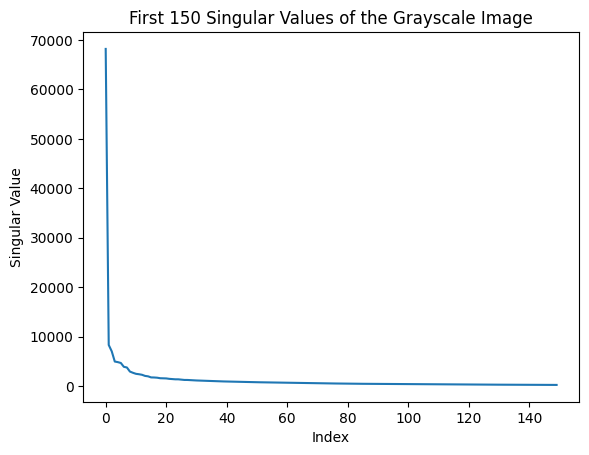

In [8]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# Load the grayscale image
image = io.imread('boat-2.png', as_gray=True)

# Convert the image to a matrix
image_matrix = np.array(image, dtype=float)

# Perform SVD on the grayscale image matrix
U, S, Vt = np.linalg.svd(image_matrix, full_matrices=False)

# Plot first 150 singular values
plt.plot(S[:150])
plt.title("First 150 Singular Values of the Grayscale Image")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.show()


Task 2b: Approximations with Different Ranks.

In this section, we will approximate the grayscale image using various ranks (8, 16, 32, 64, and 128) and display the corresponding images. By reconstructing the image using a reduced number of singular values, we effectively compress the image. As we increase the rank, the quality of the approximation improves, but we also retain more information (and thus increase the size of the data).

This exercise demonstrates the trade-off between image quality and compression.

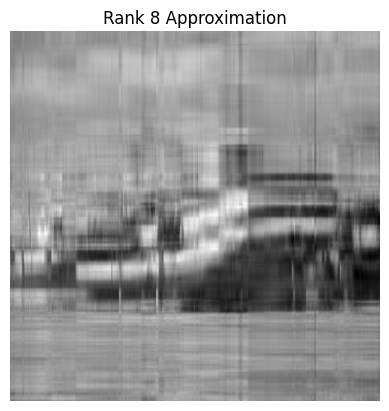

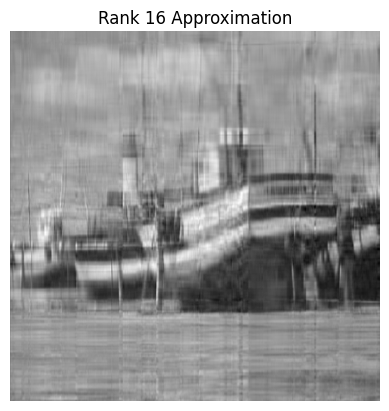

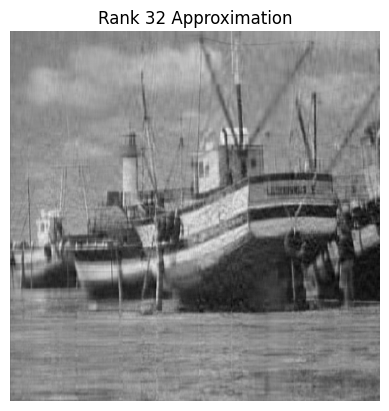

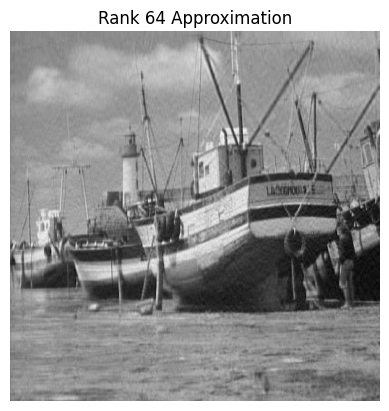

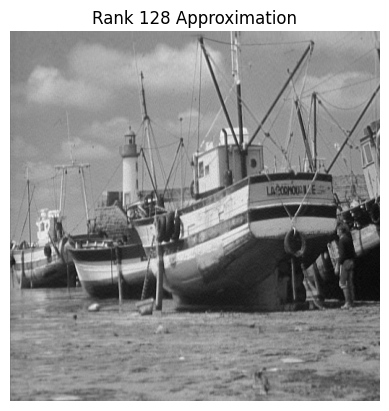

In [9]:
# Function to approximate the image using a given rank
def approximate_image(U, S, Vt, rank):
    """Reconstruct the image using the first 'rank' singular values."""
    return np.dot(U[:, :rank], np.dot(np.diag(S[:rank]), Vt[:rank, :]))

# Approximate and display images for ranks 8, 16, 32, 64, 128
ranks = [8, 16, 32, 64, 128]
for r in ranks:
    approx_image = approximate_image(U, S, Vt, r)

    # Display the approximated image
    plt.imshow(approx_image, cmap='gray')
    plt.title(f"Rank {r} Approximation")
    plt.axis('off')
    plt.show()


Task 2c: Minimum Rank for <0.5% Error
In this part of the task, we aim to find the minimum rank required to ensure that the error in the approximation is less than 0.5%. The error is measured in terms of the energy captured by the singular values, where the total energy is the sum of the squared singular values. We will find the minimum rank such that the retained singular values account for at least 99.5% of the total energy.

This step shows how we can optimize the compression to achieve a desired level of accuracy.

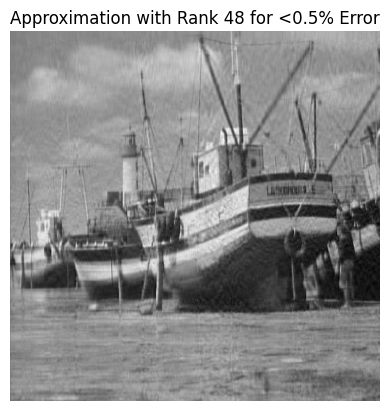

Minimum rank for <0.5% error: 48


In [10]:
# Calculate total energy (sum of squared singular values)
total_energy = np.sum(S**2)

# Calculate the required energy (99.5% of the total)
required_energy = 0.995 * total_energy

# Calculate the cumulative energy and find the minimum rank
cumulative_energy = np.cumsum(S**2)
min_rank = np.searchsorted(cumulative_energy, required_energy)

# Approximate image using this minimum rank
approx_image = approximate_image(U, S, Vt, min_rank)

# Display the image with the minimum rank approximation
plt.imshow(approx_image, cmap='gray')
plt.title(f"Approximation with Rank {min_rank} for <0.5% Error")
plt.axis('off')
plt.show()

# Output the minimum rank
print(f"Minimum rank for <0.5% error: {min_rank}")


Task 3: Color Image Compression

 In the final task, we apply SVD-based compression to a color image (mandrill.tiff). Unlike grayscale images, color images are represented by three matrices, corresponding to the Red (R), Green (G), and Blue (B) channels. Each channel can be compressed separately using SVD. We will:

Perform SVD on each color channel.
Plot the singular values for each channel to compare the significance of the information across the channels.
Approximate the image using various ranks for each channel and combine them to recreate the compressed color image.
This task demonstrates how SVD can be extended from 2D grayscale images to 3D color images by applying the decomposition to each channel independently.

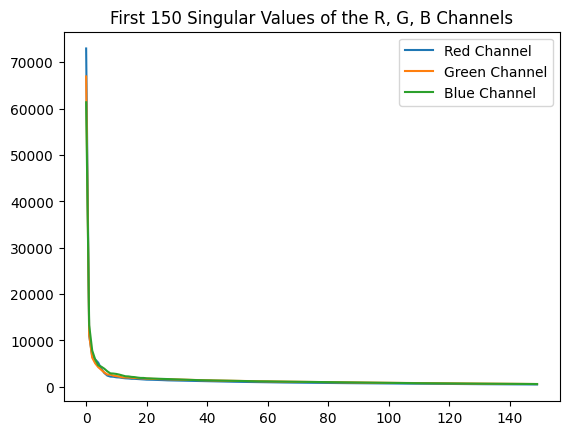

In [11]:
# Load the color image
image_color = io.imread('mandrill-1.png')

# Separate the R, G, B channels
R, G, B = image_color[:, :, 0], image_color[:, :, 1], image_color[:, :, 2]

# Perform SVD on each channel
U_R, S_R, Vt_R = np.linalg.svd(R, full_matrices=False)
U_G, S_G, Vt_G = np.linalg.svd(G, full_matrices=False)
U_B, S_B, Vt_B = np.linalg.svd(B, full_matrices=False)

# Plot the first 150 singular values for each channel
plt.plot(S_R[:150], label="Red Channel")
plt.plot(S_G[:150], label="Green Channel")
plt.plot(S_B[:150], label="Blue Channel")
plt.title("First 150 Singular Values of the R, G, B Channels")
plt.legend()
plt.show()


Task 3b: Approximating the Color Image

Finally, we will approximate the color image by reconstructing the R, G, and B channels using a reduced number of singular values for each channel. We will approximate the image using various ranks (8, 16, 32, 64, and 128) for each channel and then combine the approximated channels to form the final image.

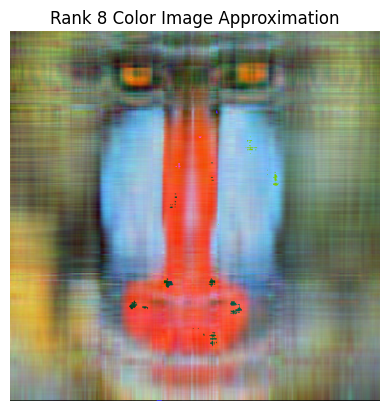

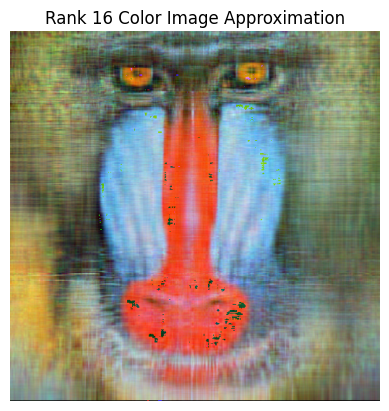

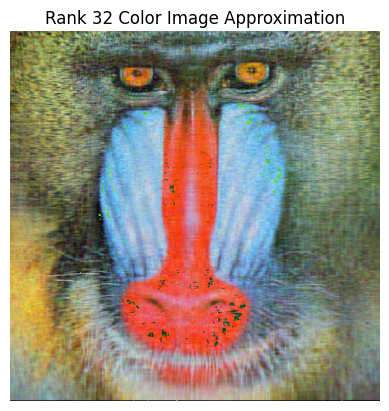

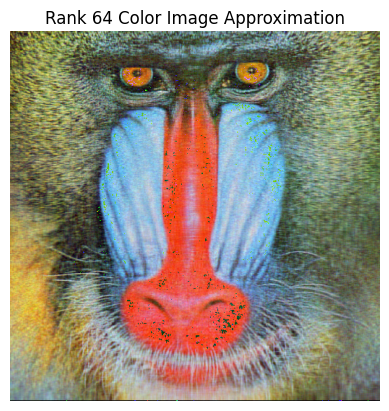

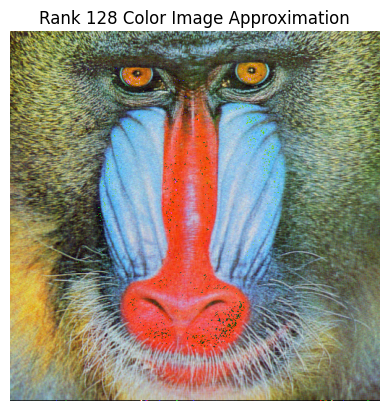

In [12]:
# Function to approximate the color image using a specific rank
def approximate_color_image(U_R, S_R, Vt_R, U_G, S_G, Vt_G, U_B, S_B, Vt_B, rank):
    R_approx = np.dot(U_R[:, :rank], np.dot(np.diag(S_R[:rank]), Vt_R[:rank, :]))
    G_approx = np.dot(U_G[:, :rank], np.dot(np.diag(S_G[:rank]), Vt_G[:rank, :]))
    B_approx = np.dot(U_B[:, :rank], np.dot(np.diag(S_B[:rank]), Vt_B[:rank, :]))
    return np.stack([R_approx, G_approx, B_approx], axis=2)

# Approximate and display color images for ranks 8, 16, 32, 64, 128
ranks = [8, 16, 32, 64, 128]
for r in ranks:
    approx_image = approximate_color_image(U_R, S_R, Vt_R, U_G, S_G, Vt_G, U_B, S_B, Vt_B, r)
    plt.imshow(approx_image.astype(np.uint8))
    plt.title(f"Rank {r} Color Image Approximation")
    plt.axis('off')
    plt.show()
